# Audioset clean subset

Let's see what's in this subset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../utils/filtered_metadata.csv", converters={'labels': eval}, index_col=0)
data["duration"] = data.end - data.start

In [3]:
data.head()

,file_id,start,end,labels,duration
0,---yQzzLcFU,30.0,40.0,[Heavy engine (low frequency)],10.0
1,--0XKTm28ts,50.0,60.0,[Vehicle],10.0
2,--11PIhoFjg,30.0,40.0,[Clatter],10.0
3,--2zH6Gmu0Q,30.0,40.0,[Sliding door],10.0
4,--46xGNV1H0,30.0,40.0,[Heavy engine (low frequency)],10.0


In [4]:
classes_number = len(data.labels.map(lambda x : x[0]).unique())
total_duration = data.duration.sum() / 3600
number_of_files = data.shape[0]

In this subset, we have :

In [5]:
print(f"Number of noise classes   : {classes_number}")
print(f"Number of files           : {number_of_files}")
print(f"Total duration (in hours) : {total_duration}")

Number of noise classes   : 408
Number of files           : 98385
Total duration (in hours) : 270.49555555555554


## Repartition of noises

In [6]:
METACLASSES = {
  "Human sounds": [i for i in range(72)],
  "Animal sounds": [i for i in range(72,137)],
  "Music": [i for i in range(137,283)],
  "Natural sounds": [i for i in range(283,296)],
  "Sounds of things": [i for i in range(296,459)],
  "Source-ambiguous sounds": [i for i in range(459,506)],
  "Channel, environment and background": [i for i in range(506,527)]
}

In [7]:
labels_index = pd.read_csv("../utils/class_labels_indices.csv")

metaclass_column = list()
for meta, values in METACLASSES.items():
    metaclass_column.extend([meta] * len(values))

labels_index["metaclass"] = metaclass_column
map_label_class = labels_index.set_index('display_name')['metaclass'].to_dict()

In [8]:
data["metaclass"] = data["labels"].map(lambda x: x[0]).map(map_label_class)
duration_by_metaclass = data.groupby(["metaclass"]).sum()/ 3600
duration_by_metaclass = duration_by_metaclass.reset_index()[["metaclass", "duration"]]

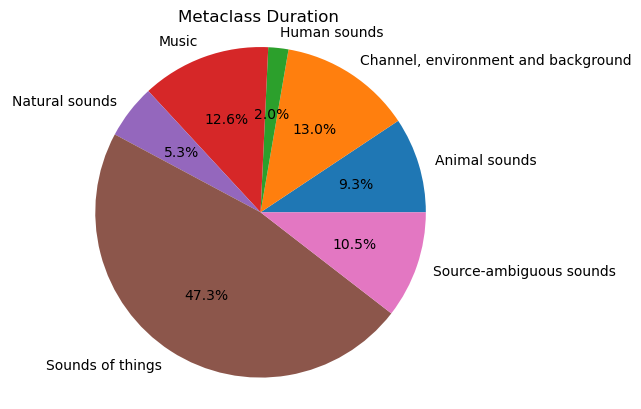

In [10]:
# Plot the pie chart
duration_by_metaclass.plot(kind='pie', y='duration', labels=duration_by_metaclass['metaclass'], autopct='%1.1f%%', legend=False)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.ylabel('')  # Remove the y-axis label
plt.title('Metaclass Duration')  # Add a title

# Save the chart
plt.savefig("metaclass_duration.png", bbox_inches="tight")

# Display the chart
plt.show()